In [ ]:
# Agglomerative Heiarchical Clustering: Avian Cluster
# Notes:
  # Two types of Heiarchical Clustering Algorithms: Agglomerative and Divisive.
  # Agglomerative: Data points are clustered using a bottom-up approach starting with individual data points.
  # Divisive: All the data points are treated as one big cluster, we later divide it into smaller clusters.


In [19]:
# Imports
# You can also use scipy, a library used for many things such as clustering, optimization, etc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as heiarchy
from sklearn.cluster import AgglomerativeClustering


In [103]:
# Data
# Full dataset link: https://www.kaggle.com/datasets/zhangjuefei/birds-bones-and-living-habits
# Headers = huml, humw, ulnal, ulnaw, feml, femw, tibl, tibw, tarl, tarw
# Variables we will focus on = huml, tibl
# Ideally meant to have 6 clusters
dataset = pd.read_csv("//content//drive//MyDrive//Coding//Personal Projects//1: Artificial Intelligence//Resources//AvianAgglomerativeCluster.csv")
#dataset = dataset.iloc[:, [1,7]] # no need for ID or specie columns
dataset = dataset.iloc[:, 1:-1] # no need for ID or specie columns
dataset = dataset.values.tolist()

processedData = []

for row in dataset:
  addValue = True
  for column in range(0,len(row)):
    if str(row[column]) == "nan":
      addValue = False
  if addValue:
    processedData.append(row)

print(processedData)
print(len(dataset))
print(len(processedData))

[[80.78, 6.68, 72.01, 4.88, 41.81, 3.7, 5.5, 4.03, 38.7, 3.84], [88.91, 6.63, 80.53, 5.59, 47.04, 4.3, 80.22, 4.51, 41.5, 4.01], [79.97, 6.37, 69.26, 5.28, 43.07, 3.9, 75.35, 4.04, 38.31, 3.34], [77.65, 5.7, 65.76, 4.77, 40.04, 3.52, 69.17, 3.4, 35.78, 3.41], [62.8, 4.84, 52.09, 3.73, 33.95, 2.72, 56.27, 2.96, 31.88, 3.13], [61.92, 4.78, 50.46, 3.47, 49.52, 4.41, 56.95, 2.73, 29.07, 2.83], [79.73, 5.94, 67.39, 4.5, 42.07, 3.41, 71.26, 3.56, 37.22, 3.64], [86.98, 5.68, 74.52, 4.55, 44.46, 3.78, 76.02, 3.81, 37.94, 3.81], [118.2, 7.82, 116.64, 6.13, 59.33, 5.45, 110.0, 5.58, 61.62, 4.37], [145.0, 10.42, 144.0, 7.05, 70.96, 7.44, 120.0, 7.31, 78.67, 6.34], [165.0, 11.45, 156.0, 8.68, 80.25, 7.85, 143.0, 8.25, 86.61, 6.63], [186.0, 9.83, 152.0, 8.76, 56.02, 7.02, 185.0, 8.07, 90.8, 4.59], [172.0, 8.44, 142.0, 8.43, 52.18, 6.68, 180.0, 9.62, 82.58, 5.5], [148.91, 6.78, 121.35, 6.5, 44.29, 6.33, 155.0, 6.68, 73.71, 4.24], [149.19, 6.98, 121.48, 6.21, 43.33, 5.39, 155.0, 6.61, 75.65, 3.36], [

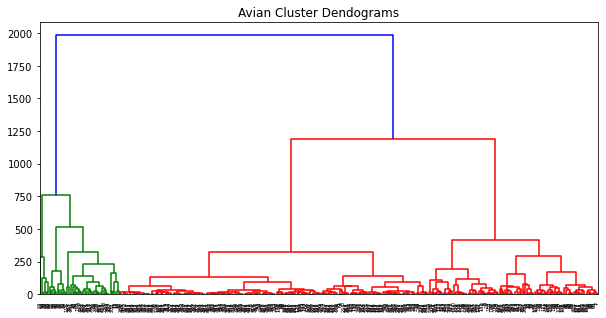

In [104]:
# Cluster Graph
plt.figure(figsize=(10, 5))
plt.title("Avian Cluster Dendograms")
dend = heiarchy.dendrogram(heiarchy.linkage(processedData, method = "ward"))

In [110]:
# Cluster Algorithm
# Affinity = specify how to measure distances between points (manhattan, l1, l2, euclidian, etc)
# Linkage = specify how to link/cluster data points together
# "Ward Linkage" is a kind of linking algorithm that attempts to minimize variance in the clusters it makes
cluster = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(processedData)
print(cluster.labels_)

[5 1 5 5 2 2 5 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 5 5 5 2 2 2 5 5 4 4 4 4 4 4
 4 3 3 1 1 0 0 1 1 0 4 4 4 4 4 4 2 2 2 3 3 3 3 3 2 2 2 1 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 5 5 0 0 1 1 1 1 1 1 1 1 5 1 1 5 1 1 5 5 5 5 1 5 5 1 1 1 1 5 5
 1 1 5 5 1 0 0 5 1 0 0 5 5 5 2 2 2 2 2 2 5 5 2 2 2 2 2 2 5 5 1 1 2 2 5 5 2
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 5 1 2 2 2 2 5 2 5 5 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 5 2 2 0 0 2 5 5 5 5 5 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 2 2 2 0 1 0 5 5 0 0 0 0 0 2 2 5 1 1 1 1 1 1 2 2 2 2 2 2 5 5 5 5 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


<Figure size 432x288 with 0 Axes>

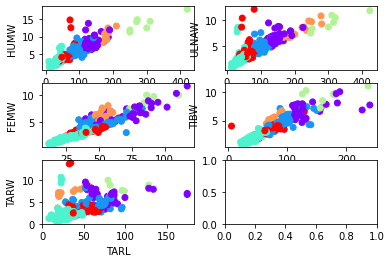

In [119]:
# Scattergrams
# Due to the 2D nature of the graph, we will only show two variables per subplot
# Headers = huml, humw, ulnal, ulnaw, feml, femw, tibl, tibw, tarl, tarw
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2)
processedData = np.array(processedData)
labelColors = ["Red", "Orange", "Yellow", "Green", "Blue", "Purple"]

axes[0][0].scatter(processedData[:,0], processedData[:,1], c = cluster.labels_, cmap = 'rainbow')
axes[0][0].set_xlabel('HUML', labelpad = 5)
axes[0][0].set_ylabel('HUMW', labelpad = 5)

axes[0][1].scatter(processedData[:,2], processedData[:,3], c = cluster.labels_, cmap = 'rainbow')
axes[0][1].set_xlabel('ULNAL', labelpad = 5)
axes[0][1].set_ylabel('ULNAW', labelpad = 5)

axes[1][0].scatter(processedData[:,4], processedData[:,5], c = cluster.labels_, cmap = 'rainbow')
axes[1][0].set_xlabel('FEML', labelpad = 5)
axes[1][0].set_ylabel('FEMW', labelpad = 5)

axes[1][1].scatter(processedData[:,6], processedData[:,7], c = cluster.labels_, cmap = 'rainbow')
axes[1][1].set_xlabel('TIBL', labelpad = 5)
axes[1][1].set_ylabel('TIBW', labelpad = 5)

axes[2][0].scatter(processedData[:,8], processedData[:,9], c = cluster.labels_, cmap = 'rainbow')
axes[2][0].set_xlabel('TARL', labelpad = 5)
axes[2][0].set_ylabel('TARW', labelpad = 5)

plt.show()
